# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data Files

In [2]:
import glob

# Find all text files starting with "out"
fileListData = glob.glob("out*.txt")

# Organize the data into arrays
dataArr = []
for file in fileListData:
    _, L, K, w, gam = file.split("-")
    L, K, w, gam = int(L), int(K), float(w), float(gam[:-4])
    
    # Load the file as an array of strings
    data = np.loadtxt(file)
    dataArr += [(L, K, w, gam, data)]


# Find all text files starting with "time"
fileListTime = glob.glob("time*.txt")

# Get time data
ttArr, rrArr, uuArr = [], [], []
for fileName in fileListTime:
    with open(fileName, "r") as file:
        text = file.read().split("\n")
        text = [item for item in text if len(item) > 2]

    tt, rr, uu = [], [], []

    # Timing itself
    for item in text:
        item = item.split()
        tt += [int(item[5][:-1])]
        rr += [float(item[6])]

    ttArr += [tt]
    rrArr += [rr]
    uuArr += [uu]

ttArr = np.array(ttArr)
rrArr = np.array(rrArr)
uuArr = np.array(uuArr)

# Density of States

In [3]:
# Thermodynamic DOS (for t = 1)
def dosThermo(eps: np.ndarray) -> np.ndarray:
    eps = np.where(abs(eps) >= 2, np.zeros_like(eps), eps)
    return np.where(abs(eps) >= 2, np.zeros_like(eps), 1 / (2 * np.pi * np.sqrt(1 - (eps**2) / 4)))

# Visualization

In [4]:
def plotAll(dataArr: list, cols: int) -> None:
    # Needed number of columns
    rows = len(dataArr) // cols + 1

    plt.figure(figsize=(cols * 6, rows * 4))
    for index, item in enumerate(dataArr):
        # Getting data
        L, K, w, gam, data = item
        dosThermoArr = dosThermo(data[0, :])

        # Plotting
        plt.subplot(rows, cols, index+1)
        plt.title(f"Density of States for $L$ = {L}, $K$ = {K}, $w$ = {w} $\\gamma$ = {gam}")
        plt.plot(data[0, :], data[1, :], label="Calculated DOS")
        # plt.plot(data[0, :], dosThermoArr, label="Thermodynamic DOS")
        plt.xlabel("$\\varepsilon / t$")
        plt.ylabel("$\\rho(\\varepsilon) \\times t$")
        plt.legend()

        # Analysis
        print(f"Analysis for L = {L}, Nsc = {K}, w = {w} gam = {gam}")
        print(f"Maximum difference is {np.max(np.abs(data[1, :] - dosThermoArr))}")
        print(f"Average difference is {np.mean(data[1, :] - dosThermoArr)}")
        print(f"Std of difference is {np.std(data[1, :] - dosThermoArr)}")
        print("\n\n")    

    plt.subplots_adjust(hspace=0.35)
    plt.show()

Analysis for L = 16, Nsc = 400, w = 0.0 gam = 0.005
Maximum difference is 1.3087601452293736
Average difference is -0.011572807284837422
Std of difference is 0.08901967461665979



Analysis for L = 16, Nsc = 400, w = 0.5 gam = 0.005
Maximum difference is 5.507684305471916
Average difference is -0.03584058941433986
Std of difference is 0.2784559140423017



Analysis for L = 4, Nsc = 400, w = 0.0 gam = 0.005
Maximum difference is 1.3087601452293736
Average difference is -0.011561613284837425
Std of difference is 0.08905897154753178



Analysis for L = 4, Nsc = 400, w = 0.5 gam = 0.005
Maximum difference is 5.605578305471916
Average difference is -0.03584061423433987
Std of difference is 0.27643613343115775





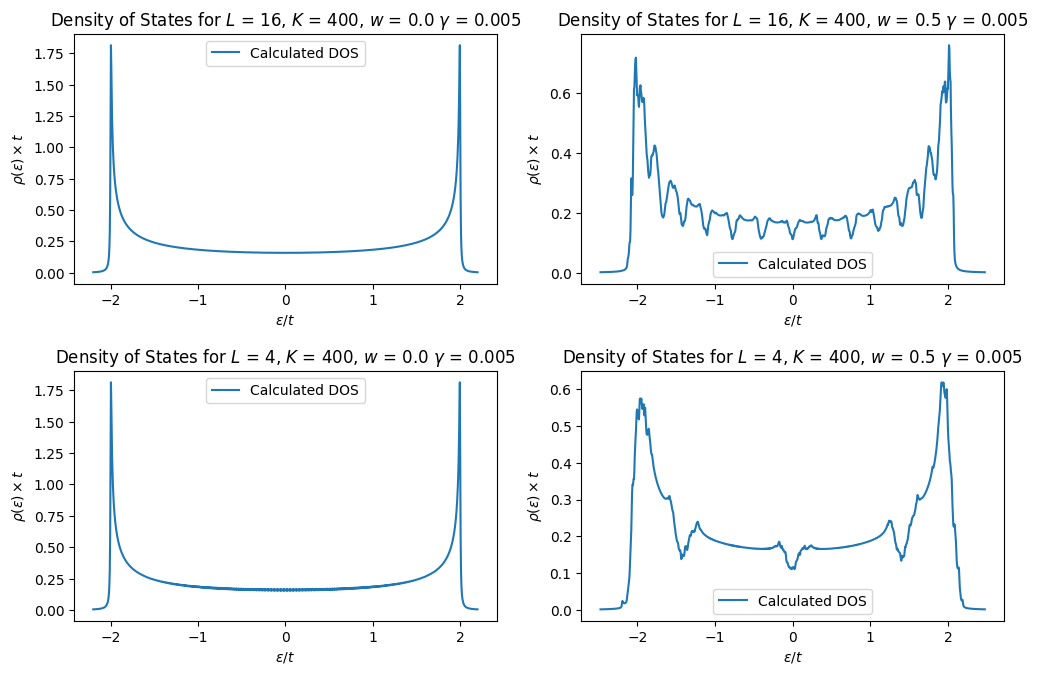

In [5]:
plotAll(dataArr, 2)

# Parallelization

NameError: name 'tt' is not defined

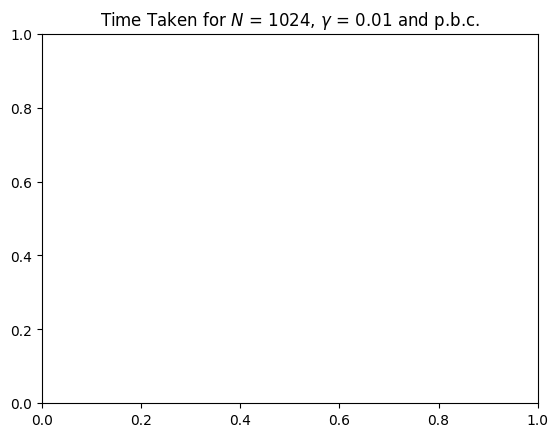

In [6]:
plt.title(f"Time Taken for $N$ = {1024}, $\\gamma$ = {0.01} and {'p.' if True else 'o.'}b.c.")
for tt, rr, index in zip(ttArr, rrArr, range(0, len(ttArr))):
    plt.plot(tt, rr[0] / rr, label=f"Trial {index+1}")

plt.plot(tt, tt, label="Expected Speedup")
plt.xlabel("Number of Threads")
plt.ylabel("Speedup")
plt.legend()